In [3]:
library(tidyverse)
source("plotting_common.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()



In [11]:
d = bind_rows(lapply(Sys.glob("../city2ba/*_*_*.csv"),
          function(x){ read_csv(x) %>% 
                       mutate(bal=x, type=ifelse(grepl("forward",x), "forward", "both"))
                     }))
d_agg = d %>% group_by(solver, cameras, type) %>% summarize(solve_time=sum(solve_time), setup_time=sum(setup_time))

Parsed with column specification:
cols(
  problem = col_double(),
  solver = col_character(),
  cost = col_double(),
  cost_change = col_double(),
  gradient_norm = col_double(),
  step_norm = col_double(),
  damping = col_double(),
  iters = col_double(),
  setup_time = col_double(),
  solve_time = col_double(),
  iter_time = col_double(),
  eta = col_double(),
  cameras = col_double(),
  points = col_double(),
  flops = col_double(),
  loss = col_character(),
  hostname = col_character()
)

Parsed with column specification:
cols(
  problem = col_double(),
  solver = col_character(),
  cost = col_double(),
  cost_change = col_double(),
  gradient_norm = col_double(),
  step_norm = col_double(),
  damping = col_double(),
  iters = col_double(),
  setup_time = col_double(),
  solve_time = col_double(),
  iter_time = col_double(),
  eta = col_double(),
  cameras = col_double(),
  points = col_double(),
  flops = col_double(),
  loss = col_character(),
  hostname = col_character()
)

Pars

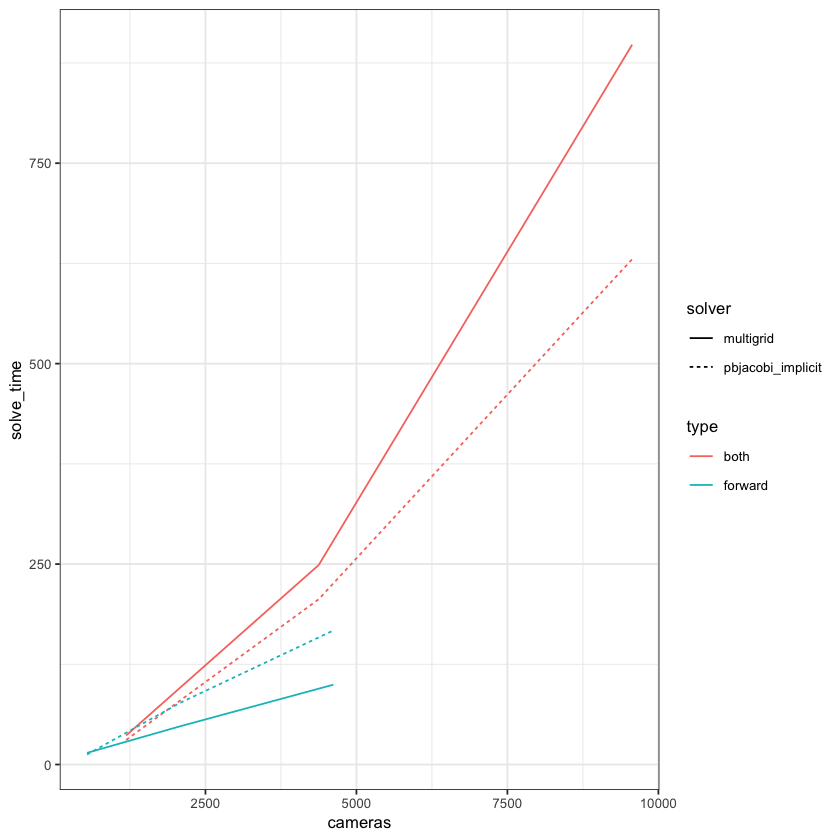

In [14]:
ggplot(d_agg, aes(x=cameras, y=solve_time, color=type, linetype=solver)) + geom_line()